<p style="text-align:center;">
<img src="https://github.com/digital-futures-academy/DataScienceMasterResources/blob/main/Resources/datascience-notebook-header.png?raw=true"
     alt="DigitalFuturesLogo"
     style="float: center; margin-right: 10px;" />
</p>

## Digital Futures Movies Exploratory Data Analysis
### <u>By Jagroop Singh<u>

## Outcomes:
* **4 visualisations** showcasing insights drawn from the data.
* **2 keypoints** drawn form the data and why.
* **2 movies** chosen for a more in-depth observation analysis.

## 0. Importing modules and data

Imported the necessary modules and made a copy of the orginal CSV DataFrame so any changes won't affect the original copy.

In [102]:
import numpy as np # calculations.
import seaborn as sns # visualisation.
import matplotlib.pyplot as plt # visualisation.
import pandas as pd # dataframes and data analysis.
from sklearn.linear_model import LinearRegression # to perform linear regression.
from matplotlib.ticker import FuncFormatter # to customise the tick labels.

In [103]:
# Assinging a variable to the dataset.
dataset = "TMDB_movies.csv"

# Creating a dataframe for the data and reading it from the CSV File.
df = pd.read_csv(dataset)

# Create a working copy for all further analysis
df_clean = df.copy()

In [104]:
# Seeing the actual CSV, only 5 rows.
df_clean.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [105]:
# more information about the dataframe itself
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

## 1. Describing the Dataset


During the initial EDA of this Dataset I found that :

* Columns such as the *Genres* , *Keywords* , *Production Countries/Companies* and *Spoken Languages* were in `JSON format`

* Loads of `Nulls` in the *Homepage* , *Tagline* , *Overview* , *Release Date* and *Runtime* columns.

> FEATURES:

**Budget** - Budget of the movie.

**Genres** - All the genres the movie has.

**Homepage** - Website link for the movie.

**Id** - Unique Id for the movie.

**Keywords** - Specific keywords to find a sepcific movie/s.

**Original_language** - Original Language.

**Original_title** - Original Title.

**Overview** - Story summary of the movie.

**Popularity** - How popular the movie is among the user ratings.

**Production_companies** - Which production companies worked on the movie.

**Production_countries** - Which countries worked on the movie.

**Release_date** - What year was the movie released in.

**Revenue** - How much revenue the movie generated.

**Runtime** - How long the movie is in minutes.

**Spoken_languages** - What languages are spoken in the movie.

**Status** - Is the movie released or not.

**Tagline** - Movie tagline.

**Title** - Title of the movie.

**Vote_average** - How many votes it got on average.

**Vote_count** - How many votes it got in total.

In [106]:
# To check the number of rows and columns, (4803,20)
df_clean.shape

(4803, 20)

In [107]:
# Checking datatypes
df_clean.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [108]:
# To see how many unique genres there are.
df_clean.genres
df_clean.genres.unique()

array(['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]',
       '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]',
       '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]',
       ...,
       '[{"id": 53, "name": "Thriller"}, {"id": 27, "name": "Horror"}, {"id": 35, "name": "Comedy"}]',
       '[{"id": 10769, "name": "Foreign"}, {"id": 53, "name": "Thriller"}]',
       '[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}, {"id": 10770, "name": "TV Movie"}]'],
      dtype=object)

In [109]:
# Doing an initial dataframe describe() only on the numeric columns.
df_clean.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## 2. Missing Data

To handle Nulls I:

* Used a function `nulls_vals(dataframe)` to display as a percentage of null values relative to the total number of entries in the dataframe.

* I simply removed the Nulls from the *Overview*, *Runtime* and *Release Date* columns using the `dropna` method, since together they account for only about 0.125% of the entire dataset.

* Since the *Homepage* and *Tagline* columns had a large number of missing values (over 70%), dropping these rows would cause significant data loss. Instead, I used the `fillna` method to replace these nulls with a meaningful placeholder string like "No homepage".


In [110]:
# Counting nulls using a Truth table, True = null, False = not null
null_df = df_clean.isnull() 
null_df.sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [111]:
# Counting non nulls using a Truth table, True = null, False = not null
notnull_df = df_clean.notnull()
notnull_df.sum()

budget                  4803
genres                  4803
homepage                1712
id                      4803
keywords                4803
original_language       4803
original_title          4803
overview                4800
popularity              4803
production_companies    4803
production_countries    4803
release_date            4802
revenue                 4803
runtime                 4801
spoken_languages        4803
status                  4803
tagline                 3959
title                   4803
vote_average            4803
vote_count              4803
dtype: int64

In [112]:
# Creating a function to show the amount of nulls 
def null_vals(dataframe):
    '''function to show both number of nulls and the percentage of nulls in the whole column'''
    null_vals = dataframe.isnull().sum() ## How many nulls in each column
    total_cnt = len(dataframe) ## Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals,columns=['null']) ## Put the number of nulls in a single dataframe
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3) ## Round how many nulls are there, as %, of the df
    
    return null_vals.sort_values('percent', ascending=False)

In [113]:
null_vals(df_clean)

,null,percent
homepage,3091,64.356
tagline,844,17.572
overview,3,0.062
runtime,2,0.042
release_date,1,0.021
budget,0,0.000
vote_average,0,0.000
title,0,0.000
status,0,0.000
spoken_languages,0,0.000


### 2.1 Dropping Nulls

Dropping the nulls from *Overview*, *Runtime*, and *Release Date* using the `dropna` method, since together they account for only about 0.125% of the entire dataset.

In [114]:
# Dropping the nulls from the Overview, Runtime and Release Date
df_clean.dropna(
    axis = 0, # default
    how = 'any', # default
    subset = ['overview', 'runtime', 'release_date'],   # subset tells dropna which columns to consider
    inplace = True # makes change permanent
)

In [115]:
null_vals(df_clean)

,null,percent
homepage,3087,64.326
tagline,840,17.504
budget,0,0.000
release_date,0,0.000
vote_average,0,0.000
title,0,0.000
status,0,0.000
spoken_languages,0,0.000
runtime,0,0.000
revenue,0,0.000


### 2.2 Filling Nulls

Since the Homepage and Tagline columns had a large number of missing values (over 70%), dropping these rows would cause significant data loss. Instead, I used the fillna method to replace these nulls with a meaningful placeholder string like "No homepage".

In [116]:
df_clean['homepage'] = df_clean['homepage'].fillna("No homepage") # Replacing all the null values in the Homepage column with a better placeholder.

In [117]:
null_vals(df_clean)

,null,percent
tagline,840,17.504
budget,0,0.000
genres,0,0.000
vote_average,0,0.000
title,0,0.000
status,0,0.000
spoken_languages,0,0.000
runtime,0,0.000
revenue,0,0.000
release_date,0,0.000


In [118]:
df_clean['tagline'] = df_clean['tagline'].fillna("No tagline available") # Replacing all the null values in the Tagline column with a better placeholder

In [119]:
null_vals(df_clean)

,null,percent
budget,0,0.0
genres,0,0.0
vote_average,0,0.0
title,0,0.0
tagline,0,0.0
status,0,0.0
spoken_languages,0,0.0
runtime,0,0.0
revenue,0,0.0
release_date,0,0.0


## 3. Converting Data

To process the JSON data format for EDA I:

* `Extract_names_from_json_column(value)` function to parse the string as a list of dictionaries, effectively transforming each column into a list of names for each relevant column.


In [120]:
import ast # Module needed to interprent strings as Python literals.

In [121]:
def extract_names_from_json_column(value):
    try:
        items = ast.literal_eval(value) # converting to an actual list of dictionaries.
        return [item['name'] for item in items] # extracting the 'name' key from each dictionary in the list.
    except (ValueError, SyntaxError, TypeError): # Error handling
        return []

In [122]:
# Applying the funtion on the relevant columns to extract the data.
df_clean['genres'] = df_clean['genres'].apply(extract_names_from_json_column)
df_clean['keywords'] = df_clean['keywords'].apply(extract_names_from_json_column)
df_clean['production_companies'] = df_clean['production_companies'].apply(extract_names_from_json_column)
df_clean['production_countries'] = df_clean['production_countries'].apply(extract_names_from_json_column)
df_clean['spoken_languages'] = df_clean['spoken_languages'].apply(extract_names_from_json_column)

In [123]:
df_clean.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [124]:
df_clean.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.799000e+03,4799.000000,4799.000000,4.799000e+03,4799.000000,4799.000000,4799.000000
mean,2.906593e+07,56899.920192,21.509884,8.232920e+07,106.903105,6.094186,690.789123
std,4.073251e+07,88236.500208,31.824074,1.629076e+08,22.561305,1.188340,1234.941795
min,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,9012.500000,4.685547,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14623.000000,12.929525,1.918402e+07,103.000000,6.200000,236.000000
75%,4.000000e+07,58461.500000,28.350728,9.295652e+07,118.000000,6.800000,737.500000
max,3.800000e+08,447027.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [125]:
# Check for any remaining missing values
df_clean.isnull().sum()


budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

## 4. Visualisations

Made a `money_formatter(x, pos)` function to show the value in Millions or Billions

In [126]:
def money_formatter(x, pos):
    """
    Custom formatter for the y-axis and x-axis to show the value in millions (M)
    or billions (B).
    """
    if x >= 1e9:
        return f'{x*1e-9:.1f}B'  # Convert to billions and format to 1 decimal place
    elif x >= 1e6:
        return f'{x*1e-6:.1f}M'  # Convert to millions and format to 1 decimal place
    else:
        return f'{x:.1f}'  # Return the number as is for values below 1 million


### Budget vs Revenue (Scatterplot with Regression Line)

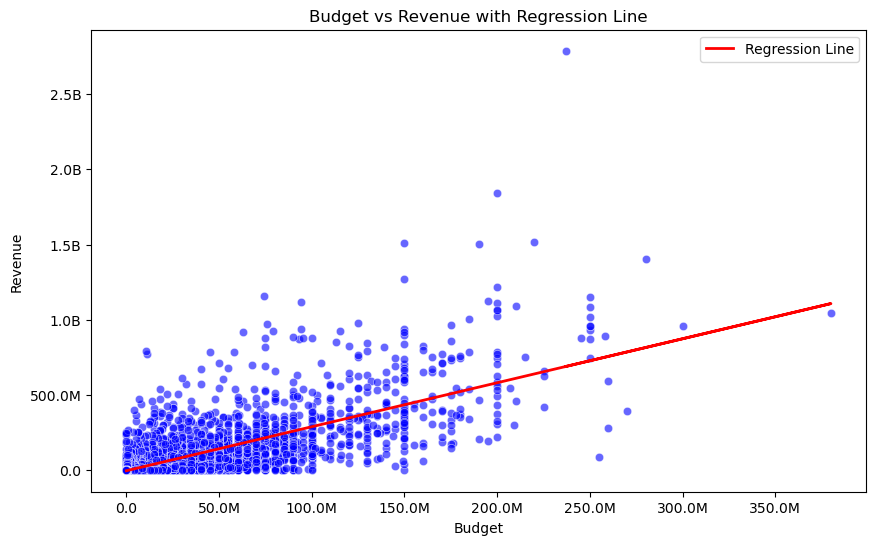

In [127]:
# Scatter plot of Budget vs Revenue
plt.figure(figsize=(10, 6))

# Plotting the scatter plot
sns.scatterplot(x='budget', y='revenue', data=df_clean, color='blue', alpha=0.6)

# Adding regression line
X = df_clean[['budget']]  
y = df_clean['revenue']   

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predicting values
y_pred = model.predict(X)

# Plotting the regression line
plt.plot(df_clean['budget'], y_pred, color='red', linewidth=2, label='Regression Line')

# Adding labels and title
plt.title('Budget vs Revenue with Regression Line')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.legend()


plt.gca().xaxis.set_major_formatter(FuncFormatter(money_formatter))  # Applying formatter to x-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(money_formatter))  # Applying formatter to y-axis


plt.show()


### <u>Analysis: Budget vs Revenue (Scatter Plot with Regression Line)</u> 
#### Helps to visualize the overall trend and provides insights into the potential return on investments for movies based on their budget.

* **Positive Correlation**: There is a clear positive correlation between the budget and revenue. As the budget of a movie increases, its revenue tends to increase as well, as seen by the upward slope of the regression line.

* **Weak Correlation for Lower Budgets**: For movies with smaller budgets (on the left side of the plot), the relationship with the revenue is weak as the revenue does not rise consistently with budget.

* **Outliers**: There are a few outliers where movies with a relatively low budget have extremely high revenue, possibly indicating blockbusters or unexpected hits. (Blair Witch Project & Paranormal Activity)

* **Regression Line**: Represents the average trend in the data and while it shows a general upward trend, it doesn't capture the many outliers or the fact that revenue for movies with extremely high budgets can be highly variable.

### Top 10 Genres by Average Revenue

C:\Users\js208\AppData\Local\Temp\ipykernel_12616\3807726472.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=genre_avg_revenue.index, y=genre_avg_revenue.values, palette='mako')


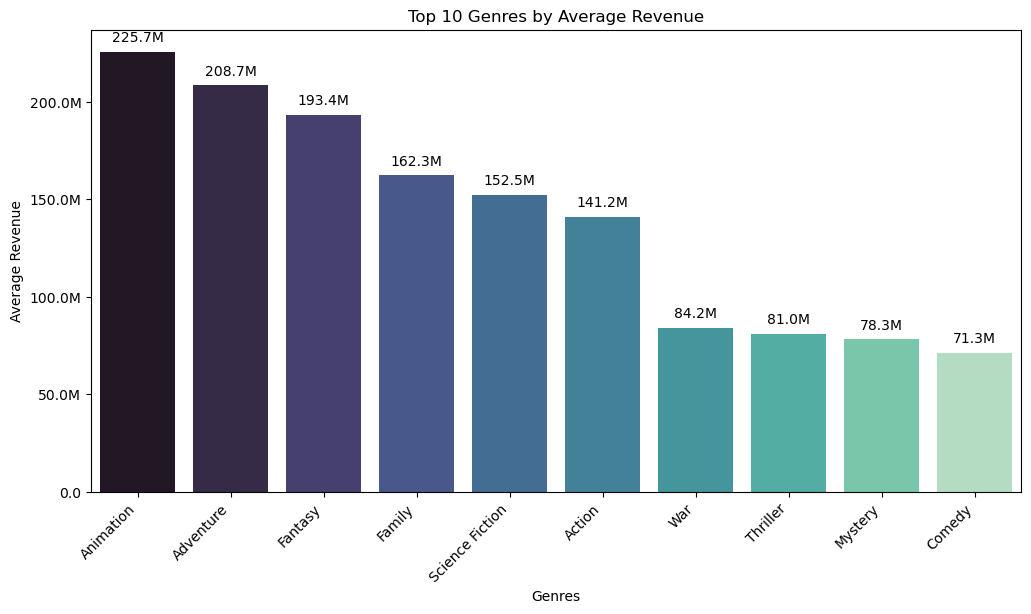

In [128]:
# Calculate average revenue by genre
genre_avg_revenue = df_clean.explode('genres').groupby('genres')['revenue'].mean().sort_values(ascending=False).head(10)

# Plotting the bar chart for Top 10 Genres by Average Revenue
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=genre_avg_revenue.index, y=genre_avg_revenue.values, palette='mako')

# Title and labels
plt.title('Top 10 Genres by Average Revenue')
plt.xlabel('Genres')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45, ha='right')

# Annotating the top of each bar with the average revenue generated per category
for p in ax.patches:
    ax.annotate(f'{money_formatter(p.get_height(), 0)}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')


plt.gca().yaxis.set_major_formatter(FuncFormatter(money_formatter))  


plt.show()


### <u>Analysis: Top 10 Genres by Average Revenue</u> 
#### Helps identify which genres tend to be more successful, offering insight into genres to focus for future projects.

* **Animation** has the highest average revenue, suggesting that animated films from studios such as Disney and Pixar perform extremely well in the box office.

* **Adventure and Fantasy** these genres tend to generate substantial revenue as well, these genres likely include many blockbuster movies. (Lord of the Rings)

* **Family-Friendly Genres**: The Family genre also ranks highly, might be because of holidays. (Christmas Movies)

* **Comedy and Mystery**: Comedy and Mystery have the lowest average revenues among the top 10 genres, which could indicate that these genres generally perform less consistently.

### Correlation Heatmap of Key variables

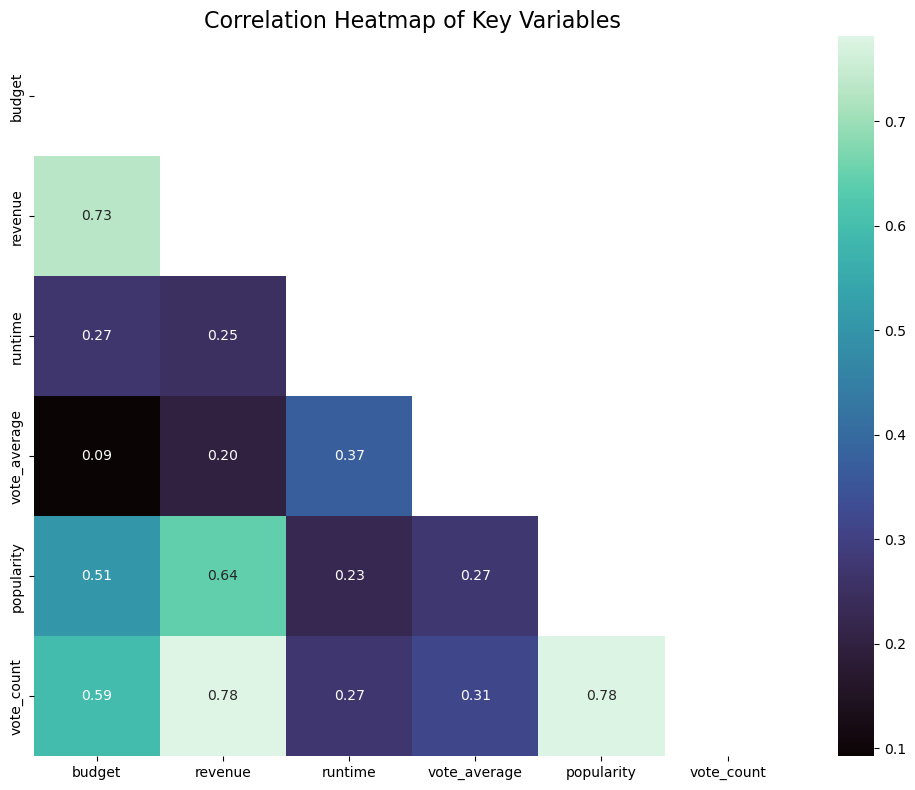

In [129]:
# Calculating the correlation matrix for the relevant numerical columns
correlation_matrix = df_clean[['budget', 'revenue', 'runtime', 'vote_average', 'popularity', 'vote_count']].corr()

# Creating the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))

# Applying the mask to hide the upper triangle of the correlation matrix
mask = np.triu(correlation_matrix) 

# Creating the heatmap with the mask applied
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt='.2f', cbar=True, mask=mask)

# Adding title and labels
plt.title('Correlation Heatmap of Key Variables', fontsize=16)


plt.tight_layout()

plt.show()



### <u>Analysis: Correlation Heatmap of Key variables</u> 
#### Helps understand which variables most influence a movie’s success.

The **correlation heatmap** shows relationships between key movie variables:

1. **Budget & Revenue (0.73)**: Strong positive correlation, meaning higher budgets tend to result in higher revenue.
2. **Popularity & Revenue (0.64)**: Moderate positive correlation, meaning more popular movies tend to earn more.
3. **Vote Count & Revenue (0.78)**: Strong correlation, movies with more votes tend to have higher revenue.
4. **Runtime**: Weak correlation with budget and revenue (0.25 - 0.27), the runtime doesn't significantly impact earnings.
5. **Vote Average**: Weak correlations across all variables, indicating that votes have little effect on financial success.


C:\Users\js208\AppData\Local\Temp\ipykernel_12616\844325483.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_clean['revenue'], shade=True, color='blue')


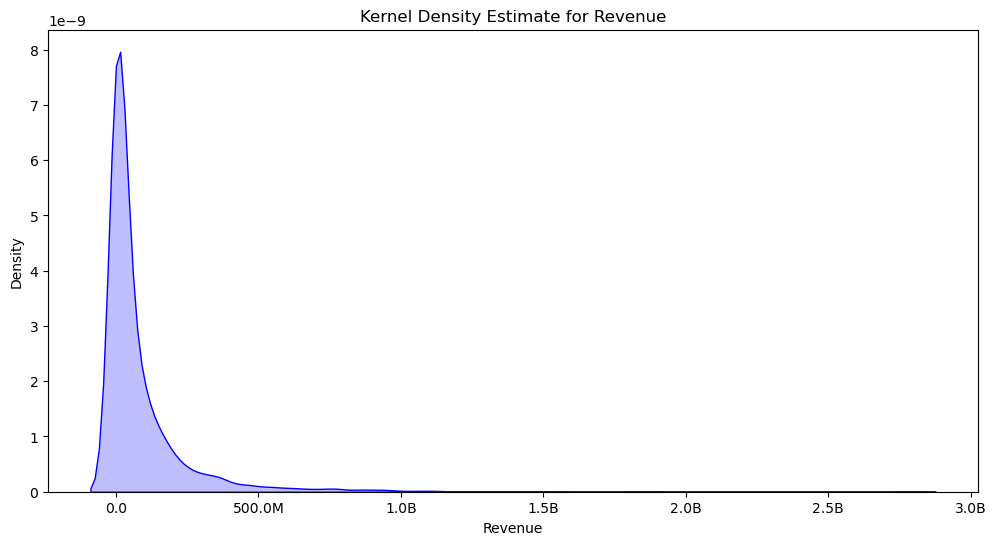

In [130]:
# KDE Plot for Revenue Distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(df_clean['revenue'], shade=True, color='blue')

# Title and labels
plt.title('Kernel Density Estimate for Revenue')
plt.xlabel('Revenue')
plt.ylabel('Density')


plt.gca().xaxis.set_major_formatter(FuncFormatter(money_formatter)) 


plt.show()


### <u>Analysis: KDE for Movie Revenue</u> 
#### This type of distribution is often seen in industries where there are a few big successes and a large number of smaller players.

* **High Concentration of Low Revenue**: The plot clearly shows that most movies have very low revenues, as seen by the sharp peak near the 0 axis. This suggests that a large number of movies have modest or low box office earnings.

* **Right Skew**: The distribution is skewed to the right, indicating that while most movies earn low revenues, there are a few movies (outliers) which earn substantialy more.

* **The Long Tail**: The long tail towards the higher revenue range indicates that there are a few movies that performed extremely well in terms of revenue.

## 5. Key Point Analysis

**1.Budget-Adjusted Revenue Analysis:**

While there is a strong correlation between budget and revenue, calculating the profitability (revenue - budget) shows that many high-budget movies do not perform as well as expected, showing poor returns for extremely large budgets.

This shows the need for more efficient budget allocation, as extremely high-budget films may not always deliver proportionally high profits. Producers should carefully evaluate production costs in relation to expected revenue to avoid major losses in certain projects.


**2. Outliers:**  Movies with Zero Revenue

Doing a quick check on how many movies there were with 0 revenue generated, showed about **1,427 movies** with zero revenue, this suggests that there are either budgeting errors, data issues, or films that had little to no success.

These movies can disrupt the average revenue and obscure trends in the data, so it may be helpful to exclude or treat these movies separately to ensure we get a more accurate representation of revenue trends and better insights into movie performance.


In [133]:
# Checking how many movies have 0 revenue
zero_revenue = df_clean[df_clean['revenue'] == 0]
print(f"Number of movies with 0 revenue: {zero_revenue.shape[0]}")


Number of movies with 0 revenue: 1423


## 6. Movie in-depth Analysis

**Avatar** (One of my Favourite Franchises!!!!)
<img src="avatar_poster.jpg" width="150" align="left" style="margin-right: 20px;"/>

**Why**: Avatar is one of the highest-grossing films of all time and it's a clear example of how a massive budget can lead to an even greater success at the box office.


**In-Depth Observation**: The massive success of Avatar wasn’t just about its budget but it also reflected cutting-edge VFX technology, a unique storyline, and a worldwide fanbase. Its high revenue is a clear indicator that movie budgets, when paired with the right content and market, can lead to exponential returns.

**Comparison**: Compared to other sci-fi blockbusters, Avatar outperformed movies like The Dark Knight or Star Wars: The Force Awakens, even with a similar or higher budget.

**John Carter**
<img src="john_poster.jpg" width="150" align="left" style="margin-right: 20px;"/>

**Why**: John Carter had an enormous budget of $250 million but failed to generate sufficient revenue, showing how a movie with high production costs doesn't always mean excellent box office performance.

**In-Depth Observation**: Despite the large budget and Disney backing it, John Carter struggled in terms of audience reception and marketing. Further showing that how even large investments can fail if the movie doesn’t resonate with the audience or fail to gain traction.

**Comparison**: Compared to other action-adventure films with similar budgets, such as "Pirates of the Caribbean: On Stranger Tides" (with a budget of $379 million), John Carter underperformed drastically, maybe due to weak marketing and confusing branding.